In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import librosa
import librosa.display
np.random.seed(42)

Try with generated data

In [2]:
sample_rate = 22050  
duration = 2.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

In [3]:
song = (
    np.sin(2 * np.pi * 440 * t) +      
    0.5 * np.sin(2 * np.pi * 880 * t)  
)


In [4]:
def plot(t,song,instance_limit):
    plt.figure(figsize=(10, 3))
    plt.plot(t[:instance_limit], song[:instance_limit])
    plt.title(f"Original waveform till {instance_limit}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

In [5]:
def similarity(a, b):
    corr = correlate(a, b, mode="valid")
    return np.max(np.abs(corr)) / (np.linalg.norm(a) * np.linalg.norm(b))


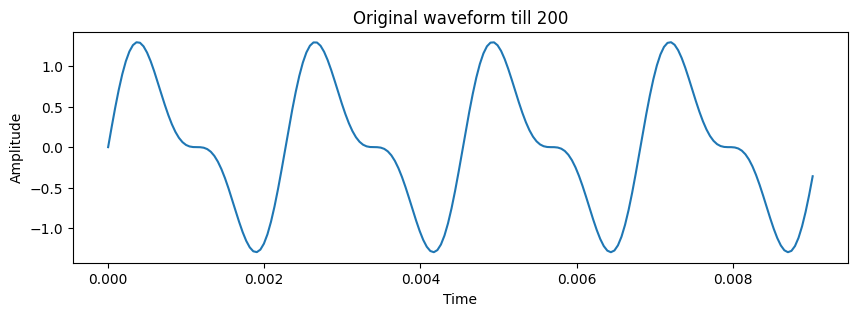

In [6]:
plot(t,song,200)

In [7]:
print("Similarity (same signal):", similarity(song, song))

Similarity (same signal): 0.9999999999999999


Lets add a time shift

In [8]:
shift_ms = 5
shift_samples = int(sample_rate * shift_ms / 1000)
shifted = song[shift_samples:]
original_trimmed = song[:-shift_samples]

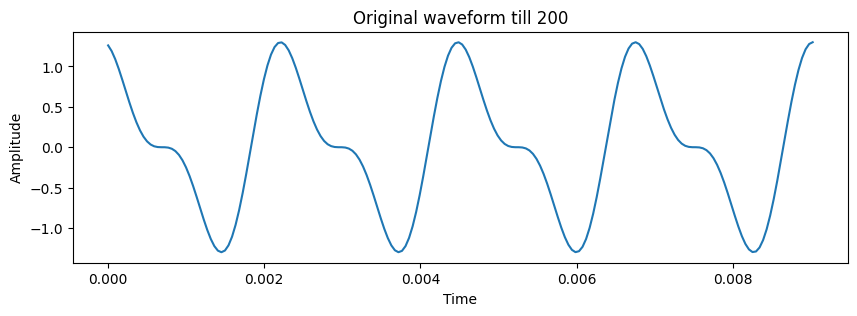

In [9]:
plot(t,shifted,200)

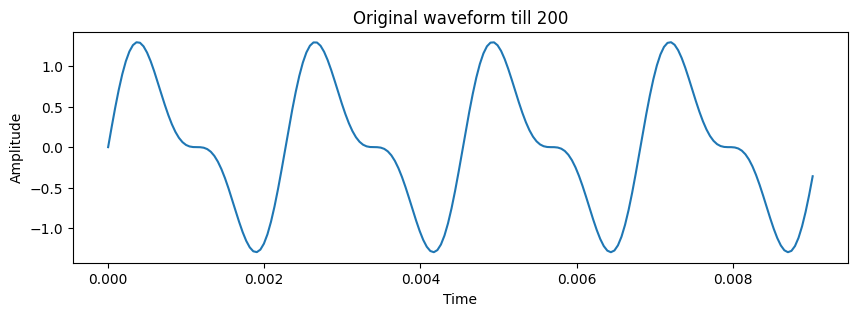

In [10]:
plot(t,original_trimmed,200)

In [11]:
print("Similarity (5ms shift):", similarity(original_trimmed, shifted))


Similarity (5ms shift): 0.11709680396371469


Add some noise

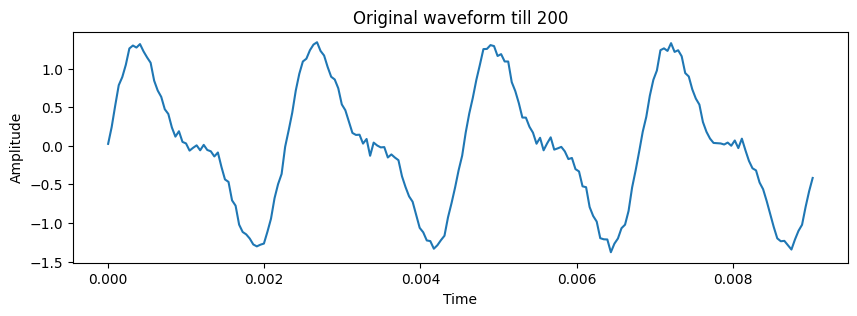

In [12]:
noise = 0.05 * np.random.randn(len(song))
noisy_song = song + noise
plot(t,noisy_song,200)


In [13]:
print("Similarity (noisy signal):", similarity(noisy_song, song))

Similarity (noisy signal): 0.9980027084909732


echo

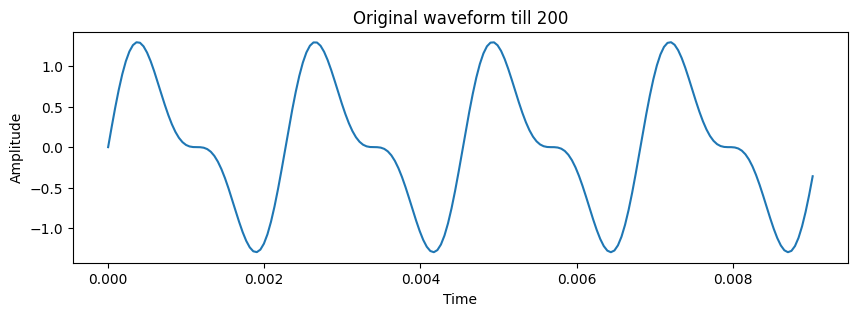

In [14]:
echo_delay = int(0.02 * sample_rate)  # 20 ms
echo = np.zeros_like(song)
echo[echo_delay:] = 0.5 * song[:-echo_delay]

echoed_song = song + echo
plot(t,echoed_song,200)

In [15]:
print("Similarity (echoed):", similarity(song, echoed_song))


Similarity (echoed): 0.9030374045484402


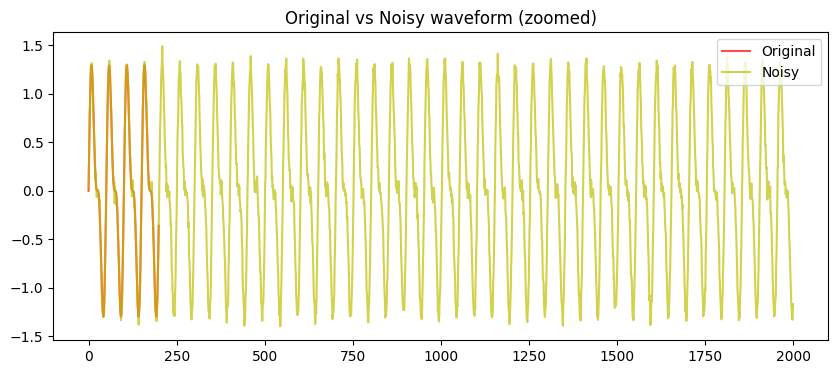

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(song[:200], label="Original",c='r',alpha = 0.7)
plt.plot(noisy_song[:2000], label="Noisy", alpha=0.7,c='y')
plt.legend()
plt.title("Original vs Noisy waveform (zoomed)")
plt.show()

Try with a real song


In [17]:
audio_path = '..\..\drum.mp3'
song, sample_rate = librosa.load(audio_path, sr=None, mono=True)

In [18]:
print(f"Sample rate: {sample_rate} Hz")
print(f"Duration: {len(song) / sample_rate:.2f} seconds")
print(f"Number of samples: {len(song)}")

Sample rate: 44100 Hz
Duration: 11.34 seconds
Number of samples: 499968


In [19]:
duration = 2.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

In [20]:
def get_song(song,duration_to_use):
    max_samples = int(sample_rate * duration_to_use)
    return song[:max_samples]

In [21]:
truncated_song = get_song(song,0.5)
t = np.linspace(0, len(song) / sample_rate, len(truncated_song), endpoint=False)

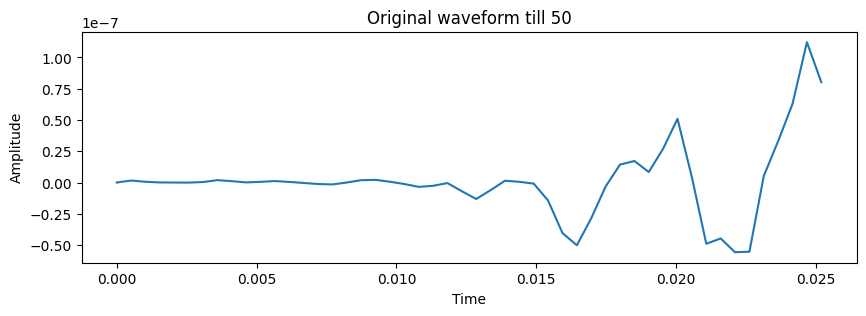

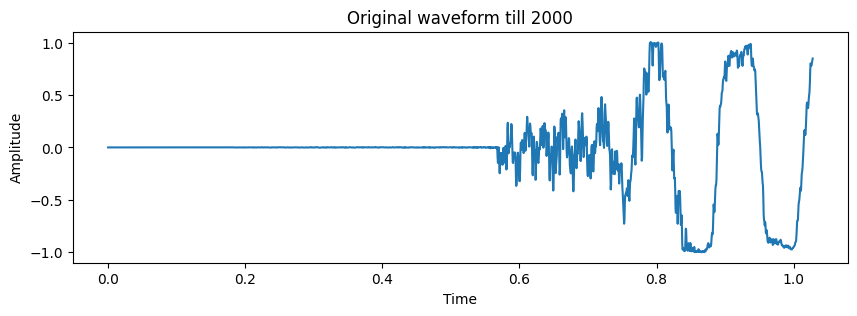

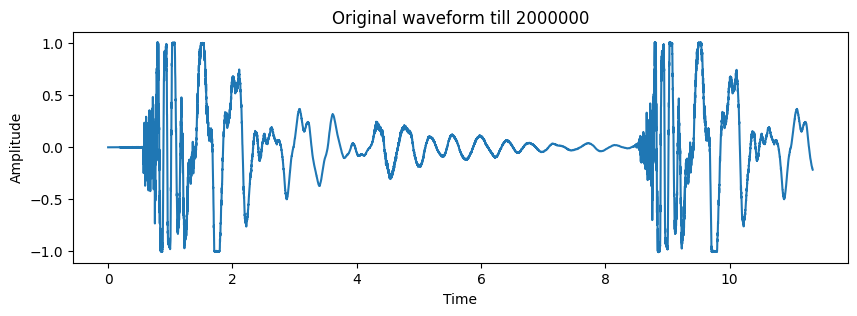

In [22]:
plot(t,truncated_song,50)
plot(t,truncated_song,2000)
plot(t,truncated_song,2000000)   

In [23]:
shift_ms = 5
shift_samples = int(sample_rate * shift_ms / 1000)
shifted = truncated_song[shift_samples:]                    
original_trimmed = truncated_song[:-shift_samples]          
time_trimmed = t[:-shift_samples]
time_shifted = t[shift_samples:]


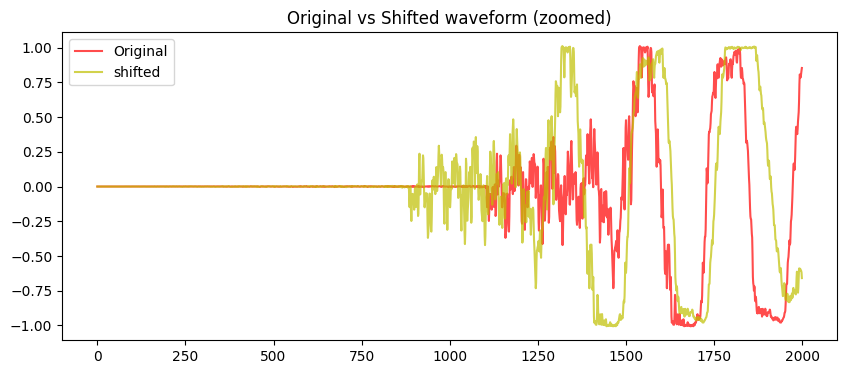

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(original_trimmed[:2000], label="Original",c='r',alpha = 0.7)
plt.plot(shifted[:2000], label="shifted", alpha=0.7,c='y')
plt.legend()
plt.title("Original vs Shifted waveform (zoomed)")
plt.show()

In [25]:
print("Similarity (echoed):", similarity(original_trimmed, shifted))


Similarity (echoed): 0.20383404
